# Credit_Risk_Problem

# Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

# Merge two csvs and filtering missing values

In [17]:
ar_df= pd.read_csv("application_record.csv")
print(ar_df.shape)
cr_df= pd.read_csv("credit_record.csv")
print(cr_df.shape)
mr_df= pd.merge(ar_df,cr_df, how='inner', on='ID')
print(mr_df.isna().any(), mr_df.shape)
mr_df = mr_df.dropna()
print(mr_df.isna().any(), mr_df.shape)

(438557, 18)
(1048575, 3)
ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
MONTHS_BALANCE         False
STATUS                 False
dtype: bool (777715, 20)
ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL           

In [12]:
listcat = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE","STATUS"]
for i in listcat:
    mr_df[i] = mr_df[i].astype('category')
    mr_df[i] = mr_df[i].cat.codes

mr_df.to_csv("merged_cat.csv", index=False)

# Details about dataset

In [13]:
print("application_record\n",ar_df.head())
print("credit_record\n",cr_df.head())
print("merged_record\n",mr_df.head())

application_record
         ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented ap

In [14]:
print("application_record\n",ar_df.info())
print("credit_record\n",cr_df.info())
print("merged_record\n",mr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [15]:
print("application_record\n",ar_df.describe())
print("credit_record\n",cr_df.describe())
print("merged_record\n",mr_df.describe())

application_record
                  ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   


# Corelation matrix and pairplot for feature importance

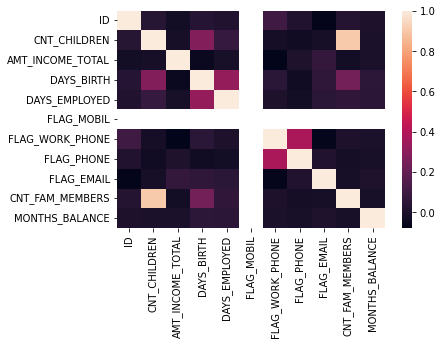

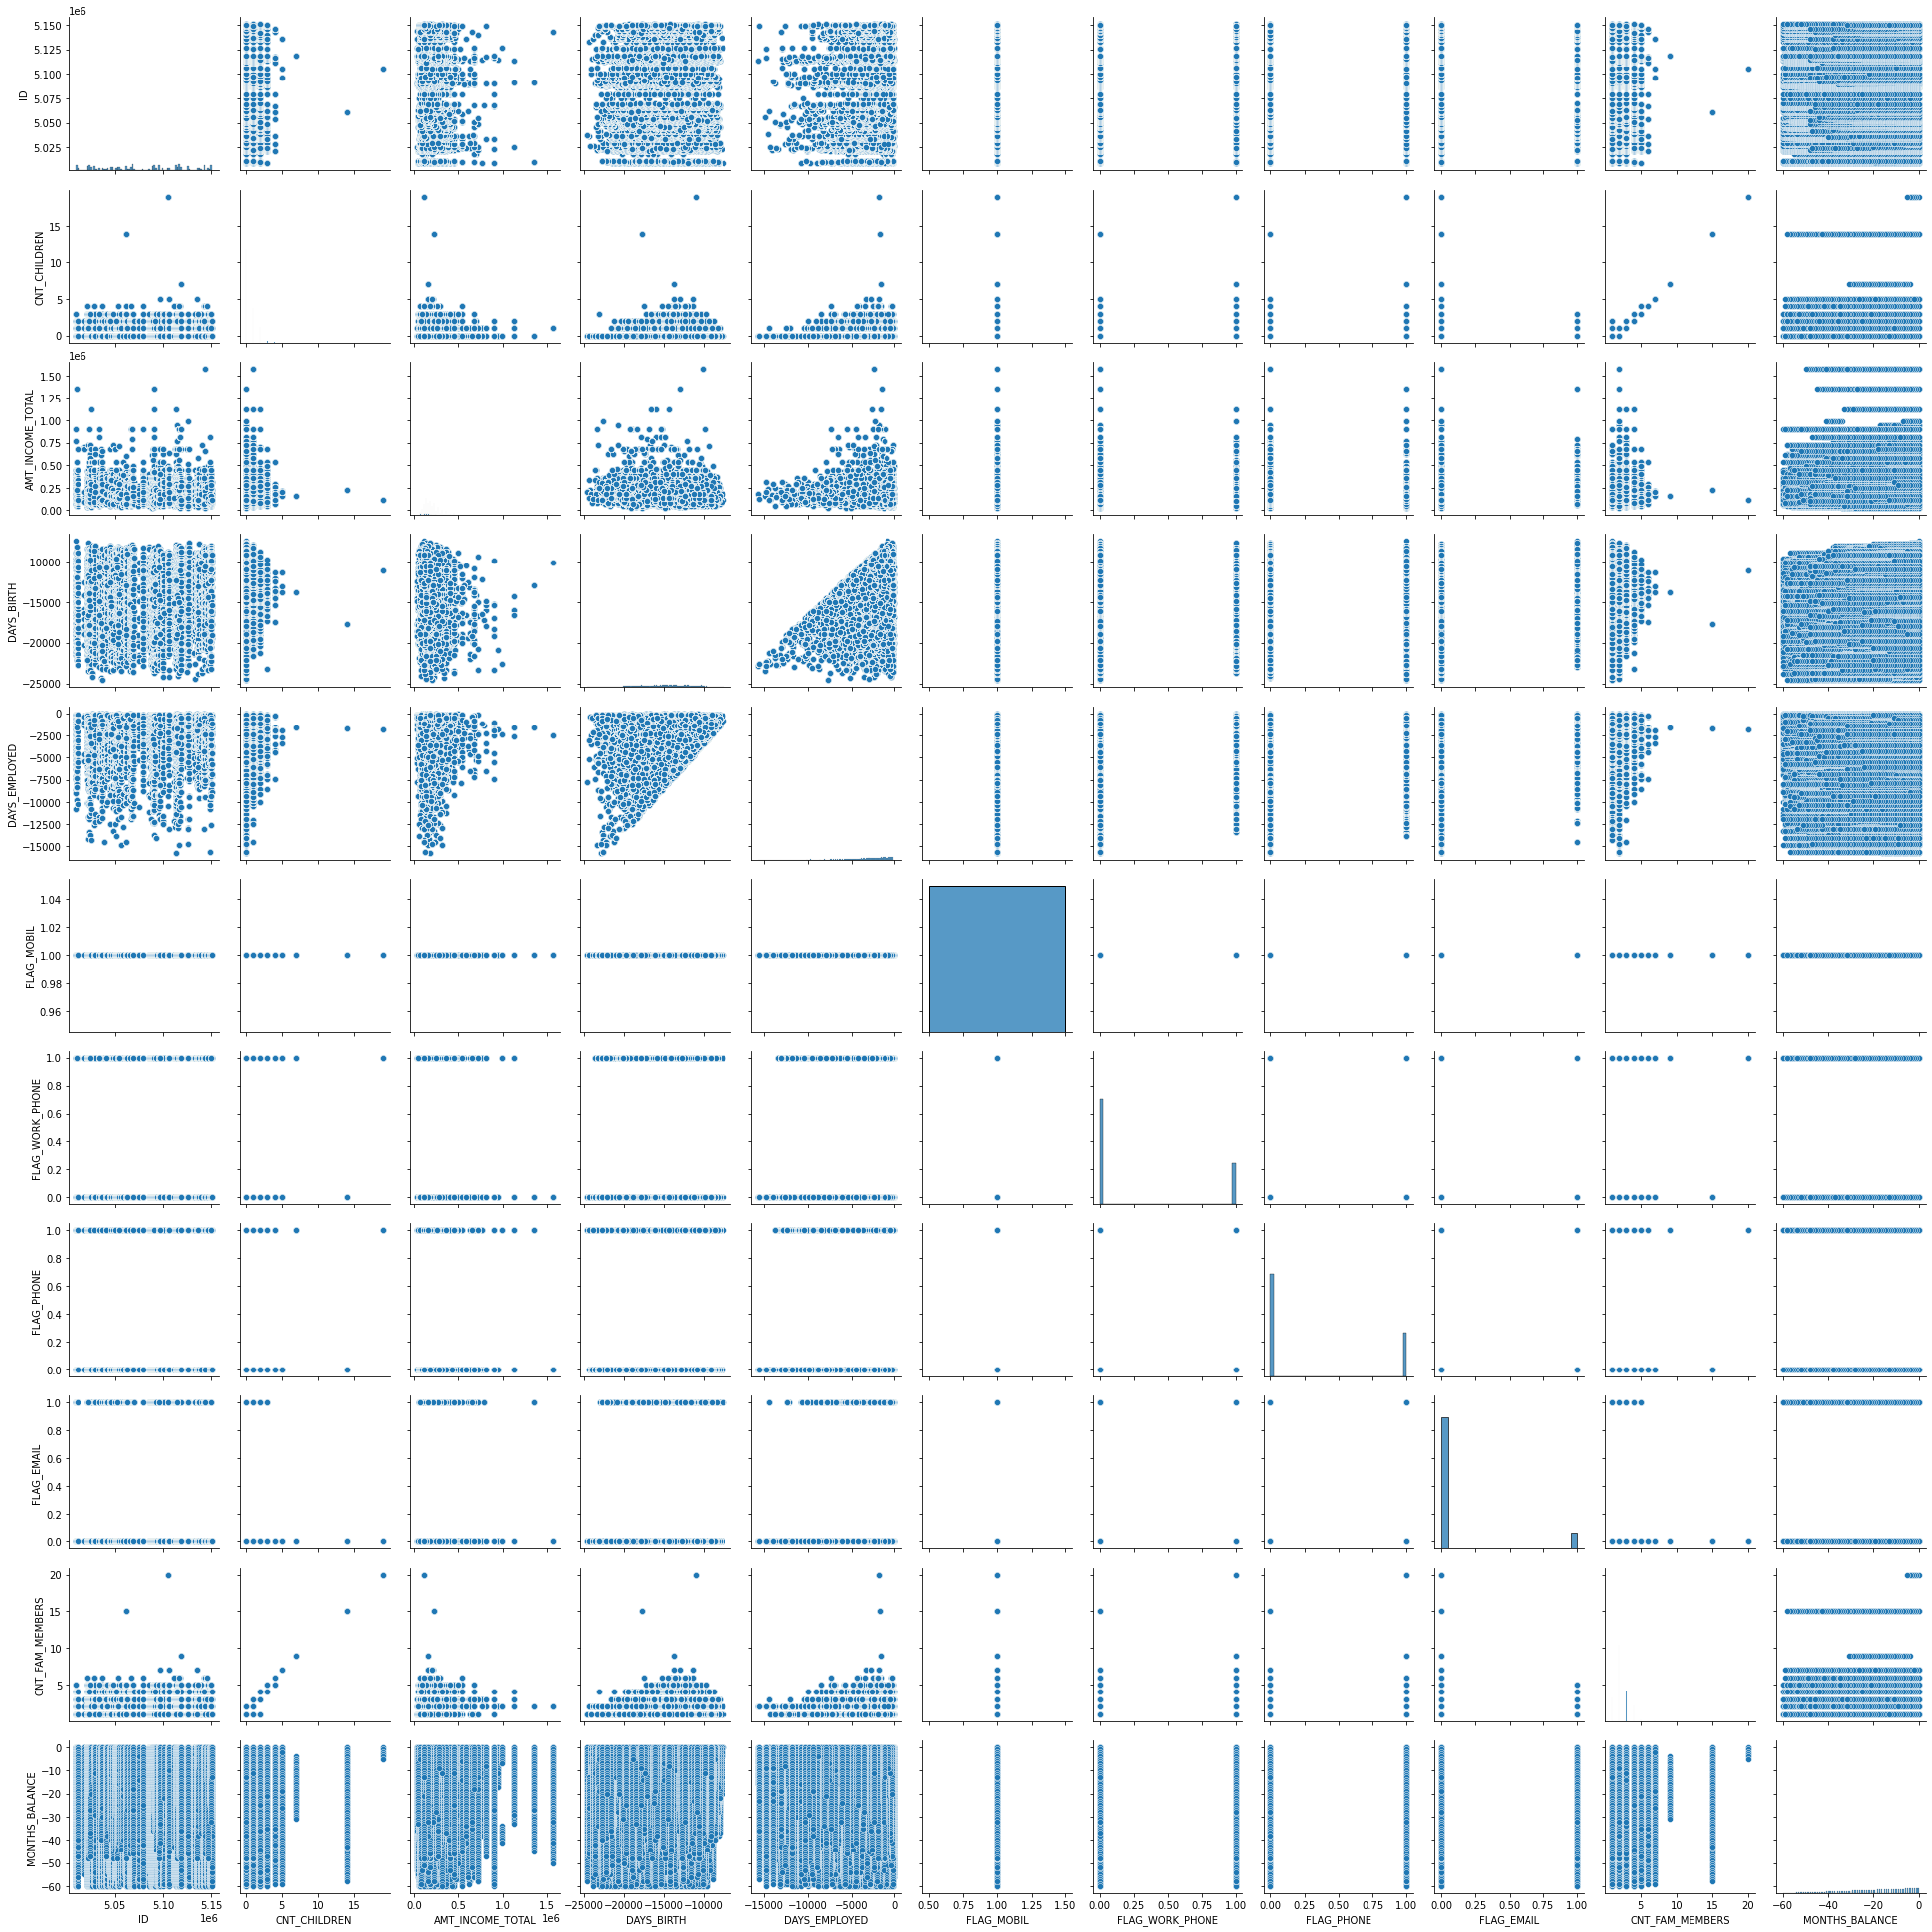

In [18]:
dataplot=sb.heatmap(mr_df.corr())
mp.show()
dataplot= sb.pairplot(mr_df)
mp.show()

# Labels are not available so created with status which is more than 3 months, to have support of it we clustered data so that importance of other features can be combined

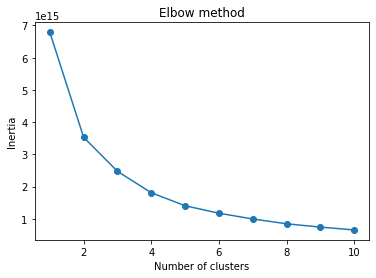

In [2]:

data = pd.read_csv("merged_cat.csv")
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

mp.plot(range(1,11), inertias, marker='o')
mp.title('Elbow method')
mp.xlabel('Number of clusters')
mp.ylabel('Inertia')
mp.show()


In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
#hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
#labels = hierarchical_cluster.fit_predict(data)

data['Kmeans_cluster'] = kmeans.labels_
#data['Hira_cluster'] = labels

data.to_csv("merged_cluster.csv", index=False)

# Applied 5 methods to find accuracy for clustered as well as non-clustered labels

D:\ml\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ml\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ml\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
               precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       359
     class 1       1.00      1.00      1.00    160942

    accuracy                           1.00    161301
   macro avg       0.50      0.50      0.50    161301
weighted avg       1.00      1.00      1.00    161301

Classification Report
               precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       359
     class 1       1.00      1.00      1.00    160942

    accuracy                           1.00    161301
   macro avg       0.50      0.50      0.50    161301
weighted avg       1.00      1.00      1.00    161301



D:\ml\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ml\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ml\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
               precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       359
     class 1       1.00      1.00      1.00    160942

    accuracy                           1.00    161301
   macro avg       0.50      0.50      0.50    161301
weighted avg       1.00      1.00      1.00    161301

 1) Feature_Status_Com             0.282788
 2) FLAG_MOBIL                     0.184072
 3) CODE_GENDER                    0.128269
 4) DAYS_EMPLOYED                  0.122265
 5) CNT_FAM_MEMBERS                0.059654
 6) NAME_INCOME_TYPE               0.054423
 7) FLAG_OWN_CAR                   0.038206
 8) NAME_FAMILY_STATUS             0.035102
 9) NAME_EDUCATION_TYPE            0.030508
10) AMT_INCOME_TOTAL               0.016022
11) NAME_HOUSING_TYPE              0.011634
12) FLAG_EMAIL                     0.009468
13) CNT_CHILDREN                   0.009391
14) MONTHS_BALANCE                 0.006687
15) STATUS                        

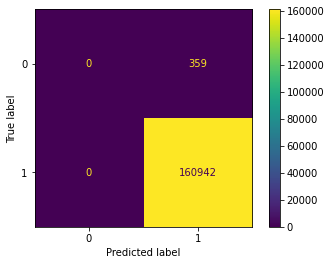

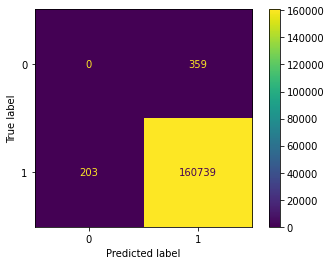

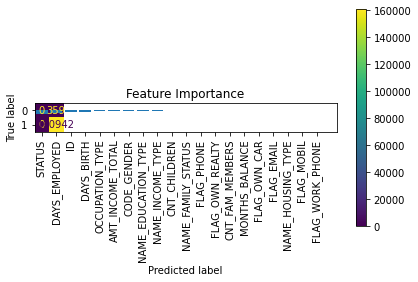

Classification Report
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       359
     class 1       1.00      1.00      1.00    160942

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301

 1) Feature_Status_Com             1.000000
 2) STATUS                         0.000000
 3) FLAG_OWN_CAR                   0.000000
 4) FLAG_OWN_REALTY                0.000000
 5) CNT_CHILDREN                   0.000000
 6) AMT_INCOME_TOTAL               0.000000
 7) NAME_INCOME_TYPE               0.000000
 8) NAME_EDUCATION_TYPE            0.000000
 9) NAME_FAMILY_STATUS             0.000000
10) NAME_HOUSING_TYPE              0.000000
11) DAYS_BIRTH                     0.000000
12) DAYS_EMPLOYED                  0.000000
13) FLAG_MOBIL                     0.000000
14) FLAG_WORK_PHONE                0.000000
15) FLAG_PHONE                    

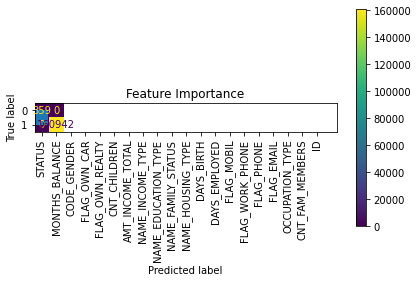

Classification Report
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       359
     class 1       1.00      1.00      1.00    160942

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301

 1) Feature_Status_Com             1.000000
 2) STATUS                         0.000000
 3) FLAG_OWN_CAR                   0.000000
 4) FLAG_OWN_REALTY                0.000000
 5) CNT_CHILDREN                   0.000000
 6) AMT_INCOME_TOTAL               0.000000
 7) NAME_INCOME_TYPE               0.000000
 8) NAME_EDUCATION_TYPE            0.000000
 9) NAME_FAMILY_STATUS             0.000000
10) NAME_HOUSING_TYPE              0.000000
11) DAYS_BIRTH                     0.000000
12) DAYS_EMPLOYED                  0.000000
13) FLAG_MOBIL                     0.000000
14) FLAG_WORK_PHONE                0.000000
15) FLAG_PHONE                    

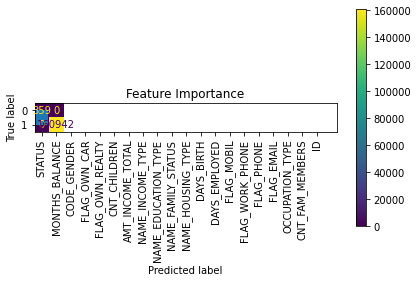

In [14]:
df = pd.read_csv("merged_cat.csv")

x_res = df.iloc[:,:-1]
y_res = df["Feature_Status_Com"]

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=567)
target_names = ['class 0', 'class 1']
accuracy =[]

model_list=[LogisticRegression(random_state=0),GaussianNB()]
for model in model_list :
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    print("Classification Report\n", classification_report(y_test, y_pred, target_names=target_names))
    
model_list=[RandomForestClassifier(max_depth=2, random_state=0),DecisionTreeClassifier(random_state=0),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]


for model in model_list :
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    print("Classification Report\n", classification_report(y_test, y_pred, target_names=target_names))
    importance = model.feature_importances_
    sorted_indices = np.argsort(importance)[::-1]
    feat_labels = df.columns[1:]
    for f in range(x_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feat_labels[sorted_indices[f]],importance[sorted_indices[f]]))
    mp.title('Feature Importance')
    mp.bar(range(x_train.shape[1]), importance[sorted_indices], align='center')
    mp.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
    mp.tight_layout()
    mp.show()


Classification Report
               precision    recall  f1-score   support

     class 0       1.00      0.99      0.99     34193
     class 1       1.00      1.00      1.00    127108

    accuracy                           1.00    161301
   macro avg       1.00      0.99      1.00    161301
weighted avg       1.00      1.00      1.00    161301

Classification Report
               precision    recall  f1-score   support

     class 0       1.00      0.96      0.98     34193
     class 1       0.99      1.00      0.99    127108

    accuracy                           0.99    161301
   macro avg       0.99      0.98      0.99    161301
weighted avg       0.99      0.99      0.99    161301

Classification Report
               precision    recall  f1-score   support

     class 0       1.00      0.99      0.99     34193
     class 1       1.00      1.00      1.00    127108

    accuracy                           1.00    161301
   macro avg       1.00      0.99      1.00    161301
weigh

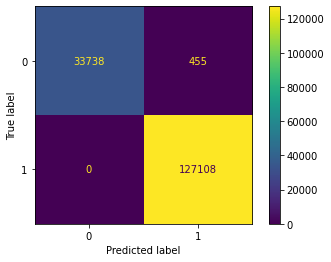

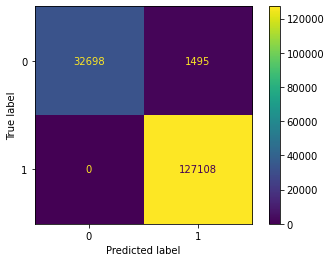

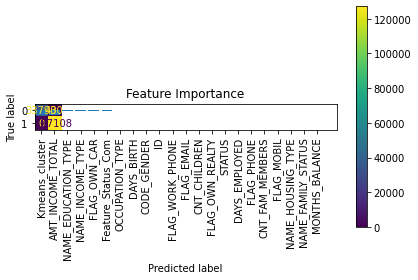

Classification Report
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     34193
     class 1       1.00      1.00      1.00    127108

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301

 1) Target_Label                   0.989139
 2) Kmeans_cluster                 0.010861
 3) FLAG_OWN_CAR                   0.000000
 4) FLAG_OWN_REALTY                0.000000
 5) CNT_CHILDREN                   0.000000
 6) AMT_INCOME_TOTAL               0.000000
 7) NAME_INCOME_TYPE               0.000000
 8) NAME_EDUCATION_TYPE            0.000000
 9) NAME_FAMILY_STATUS             0.000000
10) NAME_HOUSING_TYPE              0.000000
11) DAYS_BIRTH                     0.000000
12) DAYS_EMPLOYED                  0.000000
13) FLAG_MOBIL                     0.000000
14) FLAG_WORK_PHONE                0.000000
15) FLAG_PHONE                    

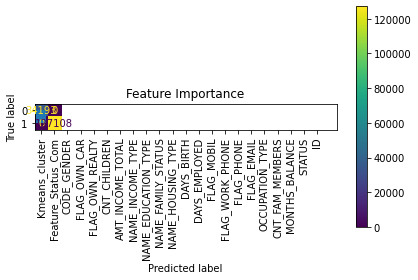

Classification Report
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     34193
     class 1       1.00      1.00      1.00    127108

    accuracy                           1.00    161301
   macro avg       1.00      1.00      1.00    161301
weighted avg       1.00      1.00      1.00    161301

 1) Target_Label                   0.991616
 2) Kmeans_cluster                 0.008384
 3) FLAG_OWN_CAR                   0.000000
 4) FLAG_OWN_REALTY                0.000000
 5) CNT_CHILDREN                   0.000000
 6) AMT_INCOME_TOTAL               0.000000
 7) NAME_INCOME_TYPE               0.000000
 8) NAME_EDUCATION_TYPE            0.000000
 9) NAME_FAMILY_STATUS             0.000000
10) NAME_HOUSING_TYPE              0.000000
11) DAYS_BIRTH                     0.000000
12) DAYS_EMPLOYED                  0.000000
13) FLAG_MOBIL                     0.000000
14) FLAG_WORK_PHONE                0.000000
15) FLAG_PHONE                    

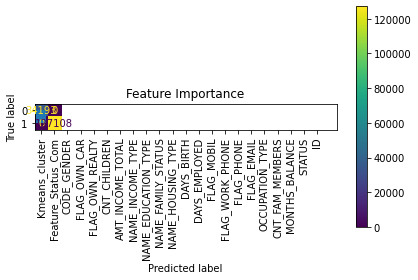

In [15]:
df = pd.read_csv("merged_cluster.csv")

x_res = df.iloc[:,:-1]
y_res = df["Target_Label"]

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=567)
target_names = ['class 0', 'class 1']
accuracy =[]

model_list=[LogisticRegression(random_state=0),GaussianNB()]
for model in model_list :
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    print("Classification Report\n", classification_report(y_test, y_pred, target_names=target_names))
    
model_list=[RandomForestClassifier(max_depth=2, random_state=0),DecisionTreeClassifier(random_state=0),GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)]


for model in model_list :
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    print("Classification Report\n", classification_report(y_test, y_pred, target_names=target_names))
    importance = model.feature_importances_
    sorted_indices = np.argsort(importance)[::-1]
    feat_labels = df.columns[1:]
    for f in range(x_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feat_labels[sorted_indices[f]],importance[sorted_indices[f]]))
    mp.title('Feature Importance')
    mp.bar(range(x_train.shape[1]), importance[sorted_indices], align='center')
    mp.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
    mp.tight_layout()
    mp.show()


# Conclusion: There is close to 99% accuracy for most of decision based algrithms, we can improve accuracy and robustness by including more detailed data with domain knowledge in decision support.